In [1]:
from PIL import Image # 이미지+워드크라우드용
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

fm.get_fontconfig_fonts()
fontpath = 'C:/Windows/Fonts/malgun.ttf' # For Windows
font_name = fm.FontProperties(fname=fontpath).get_name()
plt.rc('font', family=font_name)

%matplotlib inline

%config InlineBackend.figure_format = 'retina'


from konlpy.tag import Okt
from collections import Counter
from wordcloud import WordCloud
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("data.csv")
동아df = df[df['Species'] == '동아']
경향df = df[df['Species'] == '경향']


In [3]:
Okt = Okt()
전morphs = []
동morphs = []
경morphs = []

for sentence in 동아df['Content']:
    pos = Okt.pos(sentence)
    동morphs.append(pos)
    전morphs.append(pos)
    
    
for sentence in 경향df['Content']:
    pos = Okt.pos(sentence)
    경morphs.append(pos)
    전morphs.append(pos)


In [4]:
noun_list=[] 
for sentence in 전morphs: 
    for word, tag in sentence: 
        if tag in ['Noun'] and ('이' not in word) and ('것' not in word) and ('등' not in word) and ('수' not in word) and ('전' not in word) and ('그' not in word) and ('왜' not in word) and ('기사' not in word): 
            noun_list.append(word) 
            
count = Counter(noun_list)
전words = dict(count.most_common(102))
del(전words['인공'])
del(전words['지능'])

noun_list=[] 
for sentence in 동morphs: 
    for word, tag in sentence: 
        if tag in ['Noun'] and ('이' not in word) and ('것' not in word) and ('등' not in word) and ('수' not in word) and ('전' not in word) and ('그' not in word) and ('왜' not in word) and ('기사' not in word): 
            noun_list.append(word) 
count = Counter(noun_list)
동words = dict(count.most_common(102))
del(동words['인공'])
del(동words['지능'])

noun_list=[] 
for sentence in 경morphs: 
    for word, tag in sentence: 
        if tag in ['Noun'] and ('이' not in word) and ('것' not in word) and ('등' not in word) and ('수' not in word) and ('전' not in word) and ('그' not in word) and ('왜' not in word) and ('기사' not in word): 
            noun_list.append(word) 
count = Counter(noun_list)
경words = dict(count.most_common(102))
del(경words['인공'])
del(경words['지능'])

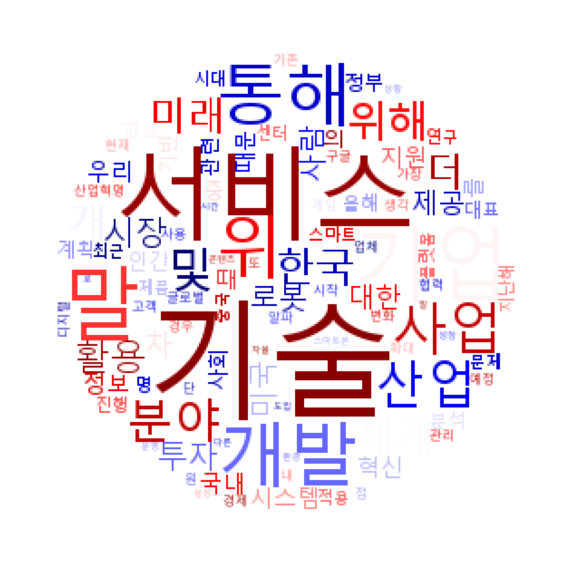

In [5]:
x, y = np.ogrid[:300, :300]
mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
mask = 255 * mask.astype(int)
wordcloud = WordCloud(font_path = fontpath, 
                      background_color='white',
                      
                      colormap = "seismic",
                      
                      mask=mask).generate_from_frequencies(전words)

fig = plt.figure(figsize=(5, 5))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('C:/Users/LEE/python/소셜빅데이터분석/기말과제/그림/워드클라우드/전체.png')
plt.show()

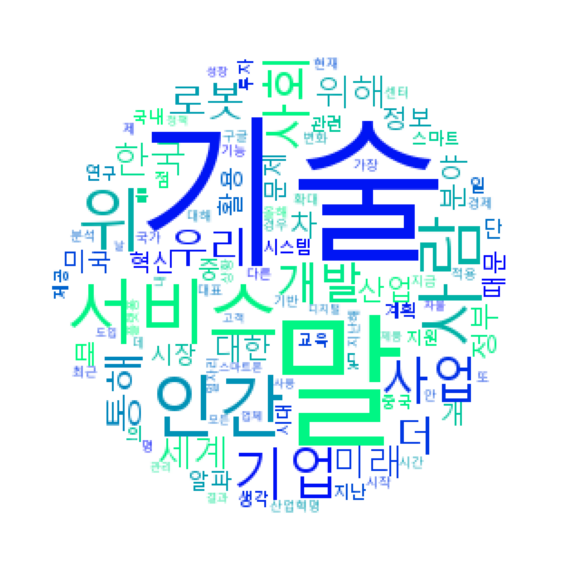

In [6]:
x, y = np.ogrid[:300, :300]
mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
mask = 255 * mask.astype(int)
wordcloud = WordCloud(font_path = fontpath, 
                      background_color='white',
                      colormap = "winter_r",
                      mask=mask).generate_from_frequencies(경words)

fig = plt.figure(figsize=(5, 5))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('C:/Users/LEE/python/소셜빅데이터분석/기말과제/그림/워드클라우드/경향.png')
plt.show()

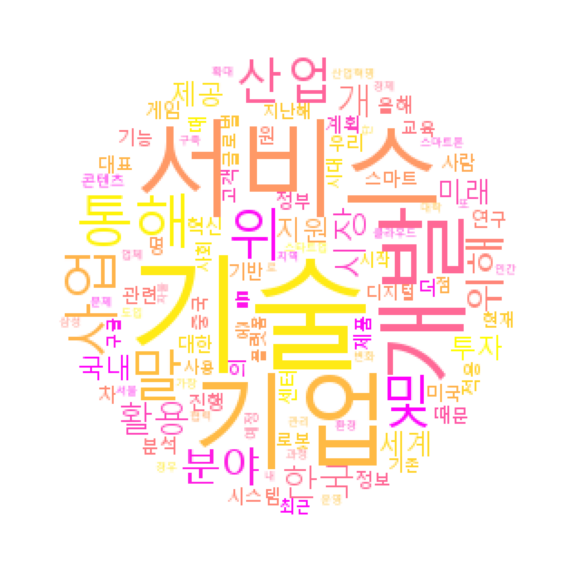

In [7]:
x, y = np.ogrid[:300, :300]
mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
mask = 255 * mask.astype(int)
wordcloud = WordCloud(font_path = fontpath, 
                      background_color='white',            
                      colormap = "spring_r",                     
                      mask=mask).generate_from_frequencies(동words)

fig = plt.figure(figsize=(5, 5))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('C:/Users/LEE/python/소셜빅데이터분석/기말과제/그림/워드클라우드/동아.png')
plt.show()